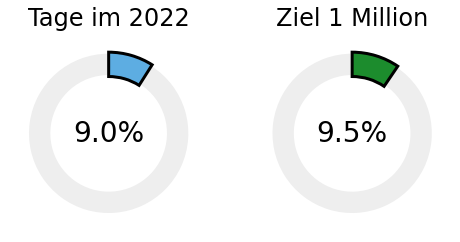

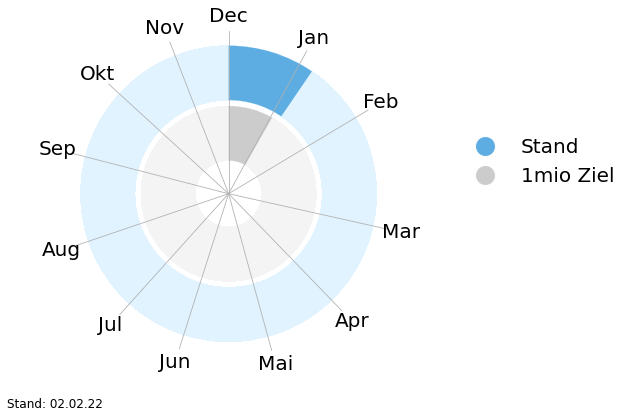

In [344]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from math import pi
import calendar

mtarget = np.array([83085, 87845, 126019, 96554, 83041, 95608, 70486, 84643, 96220, 80939, 76361, 61309])
starget = sum(mtarget)
mtarget = np.cumsum(mtarget) / starget * 100
mname = ["Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec" ]

budget = 95129

day_of_year = datetime.now().timetuple().tm_yday
target = 1e6

days = np.round(np.array([365-day_of_year, day_of_year])/365*100,1)

fig_big, ax_all = plt.subplots(1,2,figsize=(8,4))
#fig_big.suptitle('Suprelorin', fontsize=32)
#fig_big.subplots_adjust(top=1)
wedgeprops = {'width':0.3, 'edgecolor':'black', 'lw':3}
patches, _ = ax_all[0].pie(days, wedgeprops=wedgeprops, startangle=90, colors=['#EEEEEE', '#5DADE2'])
patches[0].set_zorder(0)
patches[0].set_edgecolor('white')
ax_all[0].set_title('Tage im 2022', fontsize=24, loc='center')
ax_all[0].text(0, 0, f"{days[1]}%", ha='center', va='center', fontsize=28)

money = np.round(np.array([target-budget, budget])/target*100,1)
data = money
wedgeprops = {'width':0.3, 'edgecolor':'black', 'lw':3}
patches, _ = ax_all[1].pie(data, wedgeprops=wedgeprops, startangle=90, colors=['#EEEEEE', '#1C8C2D'])
patches[0].set_zorder(0)
patches[0].set_edgecolor('white')
ax_all[1].set_title('Ziel 1 Million', fontsize=24, loc='center')
ax_all[1].text(0, 0, f"{data[1]}%", ha='center', va='center', fontsize=28)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'polar'})

data = budget/1e6 * 100

today = datetime.now()
inmonth = today.day/calendar.monthrange(today.year,today.month)[1]
target = mtarget[datetime.now().month-1] + (mtarget[datetime.now().month]-mtarget[datetime.now().month-1]) * inmonth
target = target / starget * 1e6
startangle = 0
x = (data * pi *2)/ 100 # convert x data from percentage
x2 = (target * pi * 2) / 200
left = (startangle * pi *2)/ 360 # convert start from angle

ax.barh(1.5, 360, left=left, height=0.9, color='#e0f3ff')
ax.barh(1.5, x, left=left, height=0.9, color='#5DADE2')
ax.barh(0.5, 360, left=left, height=0.9, color='#F4F4F4')
ax.barh(0.5, x2, left=left, height=0.9, color='#CCC')

ax.set_theta_direction(-1)
ax.set_theta_offset(pi)
ax.set_theta_zero_location("N")
ax.set_thetagrids(mtarget*3.6,mname, fontsize=20)
ax.set_rticks([])
#ax.set_rticks([1, 2])#[0.5, 1, 1.5, 2])
ax.spines['polar'].set_visible(False)
plt.ylim(-0.5, 2.2)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Stand', markerfacecolor='#5DADE2', markersize=20),
                  Line2D([0], [0], marker='o', color='w', label='1mio Ziel', markerfacecolor='#CCC', markersize=20)]
ax.legend(handles=legend_elements, loc=(1.2,0.5), frameon=False, fontsize=20)
fig.text(0, 0, "Stand: " + datetime.now().strftime("%d.%m.%y"), ha='left', va='bottom', fontsize=12)
plt.show()